In [1]:
""" Warning : Don't forget to remove your github username and token after running this cell """
 
import pandas as pd
import requests
import io
 
# Username of your GitHub account
 
username = ''
 
# Personal Access Token (PAO) from your GitHub account
 
token = ''
 
# Creates a re-usable session object with your creds in-built
 
github_session = requests.Session()
github_session.auth = (username, token)

In [2]:
#Loading the file so we can be able to clean it

url = 'https://raw.githubusercontent.com/OmdenaAI/WeoWater/main/task-4-scraping-newspapers/labelled_data/merged_labeled_newspaper_data.csv'
download = github_session.get(url).content #Reading and downloading the data

data = pd.read_csv(io.StringIO(download.decode('utf-8'))) #Converting the data into a pd dataframe

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4987 entries, 0 to 4986
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         4987 non-null   int64  
 1   event_id           4987 non-null   object 
 2   article_title      4987 non-null   object 
 3   article_link       4987 non-null   object 
 4   article_content    4508 non-null   object 
 5   publishing_date    4941 non-null   object 
 6   article_image      4453 non-null   object 
 7   article_keywords   4986 non-null   object 
 8   article_relevance  4413 non-null   object 
 9   category           4021 non-null   object 
 10  Country            4987 non-null   object 
 11  Unnamed: 10        1 non-null      object 
 12  Unnamed: 11        1 non-null      object 
 13  Unnamed: 9         0 non-null      float64
 14  Category           316 non-null    object 
 15  Unnamed: 12        0 non-null      float64
 16  Unnamed: 13        0 non

In [4]:
data.head()

,Unnamed: 0,event_id,article_title,article_link,article_content,publishing_date,article_image,article_keywords,article_relevance,category,Country,Unnamed: 10,Unnamed: 11,Unnamed: 9,Category,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16
0,0,FF-2012-000189-IDN,Protecting 9/11 Artifacts From Floods - WSJ - ...,https://www.wsj.com/articles/SB100014241278873...,NaN,"Sun, 11 Nov 2012 08:00:00 GMT",NaN,[],,none,India,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,FF-2012-000189-IDN,Over 80% of PH economy prone to natural disast...,https://www.rappler.com/business/more-than-80-...,"MANILA, Philippines - About 85.2% of the Phili...","Tue, 13 Nov 2012 08:00:00 GMT",https://assets2.rappler.com/images/Floods-Mani...,"['ph', 'republic', 'projects', 'prone', 'econo...",,flood,India,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,FF-2012-000189-IDN,Up the river & paddling hard: Climate adaptati...,https://forestsnews.cifor.org/11459/up-the-riv...,"LUKOLELA, Democratic Republic of Congo (14 Nov...","Thu, 15 Nov 2012 08:00:00 GMT",https://forestsnews.cifor.org/wp-content/uploa...,"['climate', 'change', 'congo', 'paddling', 'fo...",,tree,India,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,FF-2012-000189-IDN,Electric Car Maker Fisker Lost More Than 300 C...,https://www.wsj.com/articles/BL-VCDB-12514,NaN,"Tue, 06 Nov 2012 08:00:00 GMT",NaN,[],,none,India,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,FF-2012-000189-IDN,Thai prime minister insists she's not her exil...,https://www.washingtonpost.com/world/asia_paci...,Indonesian President Susilo Bambang Yudhoyono ...,"Thu, 08 Nov 2012 08:00:00 GMT",https://www.washingtonpost.com/rf/image_1484w/...,"['thailands', 'shes', 'insists', 'prime', 'bro...",,none,India,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
data_copy = data.copy()

In [6]:
data.drop('Country', inplace = True, axis = 1)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4987 entries, 0 to 4986
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         4987 non-null   int64  
 1   event_id           4987 non-null   object 
 2   article_title      4987 non-null   object 
 3   article_link       4987 non-null   object 
 4   article_content    4508 non-null   object 
 5   publishing_date    4941 non-null   object 
 6   article_image      4453 non-null   object 
 7   article_keywords   4986 non-null   object 
 8   article_relevance  4413 non-null   object 
 9   category           4021 non-null   object 
 10  Unnamed: 10        1 non-null      object 
 11  Unnamed: 11        1 non-null      object 
 12  Unnamed: 9         0 non-null      float64
 13  Category           316 non-null    object 
 14  Unnamed: 12        0 non-null      float64
 15  Unnamed: 13        0 non-null      float64
 16  Unnamed: 14        0 non

In [8]:
data['category'] = data[data.columns[8:]].apply(
    lambda x: ','.join(x.dropna().astype(str)),
    axis=1)

In [9]:
#Dropping unnecessary columns

data.drop(data.columns[data.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)#Dropping unnamed columns in the file

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4987 entries, 0 to 4986
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   event_id           4987 non-null   object
 1   article_title      4987 non-null   object
 2   article_link       4987 non-null   object
 3   article_content    4508 non-null   object
 4   publishing_date    4941 non-null   object
 5   article_image      4453 non-null   object
 6   article_keywords   4986 non-null   object
 7   article_relevance  4413 non-null   object
 8   category           4987 non-null   object
 9   Category           316 non-null    object
dtypes: object(10)
memory usage: 389.7+ KB


In [11]:
data.head(3)

,event_id,article_title,article_link,article_content,publishing_date,article_image,article_keywords,article_relevance,category,Category
0,FF-2012-000189-IDN,Protecting 9/11 Artifacts From Floods - WSJ - ...,https://www.wsj.com/articles/SB100014241278873...,NaN,"Sun, 11 Nov 2012 08:00:00 GMT",NaN,[],,",none",NaN
1,FF-2012-000189-IDN,Over 80% of PH economy prone to natural disast...,https://www.rappler.com/business/more-than-80-...,"MANILA, Philippines - About 85.2% of the Phili...","Tue, 13 Nov 2012 08:00:00 GMT",https://assets2.rappler.com/images/Floods-Mani...,"['ph', 'republic', 'projects', 'prone', 'econo...",,",flood",NaN
2,FF-2012-000189-IDN,Up the river & paddling hard: Climate adaptati...,https://forestsnews.cifor.org/11459/up-the-riv...,"LUKOLELA, Democratic Republic of Congo (14 Nov...","Thu, 15 Nov 2012 08:00:00 GMT",https://forestsnews.cifor.org/wp-content/uploa...,"['climate', 'change', 'congo', 'paddling', 'fo...",,",tree",NaN


In [12]:
# replace field that's entirely space (or empty) with NaN
import numpy as np
data = data.replace(r'^\s*$', np.nan, regex=True)

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4987 entries, 0 to 4986
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   event_id           4987 non-null   object
 1   article_title      4987 non-null   object
 2   article_link       4987 non-null   object
 3   article_content    4508 non-null   object
 4   publishing_date    4941 non-null   object
 5   article_image      4453 non-null   object
 6   article_keywords   4986 non-null   object
 7   article_relevance  253 non-null    object
 8   category           4583 non-null   object
 9   Category           315 non-null    object
dtypes: object(10)
memory usage: 389.7+ KB


In [14]:
to_drop = ['Category']#Columns to be dropped 

data.drop(to_drop, inplace = True, axis = 1)
data.sample(5)#Checking if the correct columns have been dropped

,event_id,article_title,article_link,article_content,publishing_date,article_image,article_keywords,article_relevance,category
2305,FL-2017-000067-BRA,'Amazon Venice' struggles to stay above water ...,https://www.dailysabah.com/gallery/amazon-veni...,The rivers have been swelling for weeks in Bra...,"Sat, 15 May 2021 10:44:00 GMT",https://idsb.tmgrup.com.tr/ly/uploads/images/2...,"['amazon', 'rivers', 'water', 'brazil', 'regio...",NaN,",flood"
3437,FL-2020-000185-PAK,Heavy downpour in Pakistan floods cities leavi...,https://www.wionews.com/south-asia/heavy-downp...,Floods have triggered in Pakistan after three ...,"Thu, 27 Aug 2020 07:00:00 GMT",https://cdn.wionews.com/sites/default/files/st...,"['downpour', 'rains', 'displaced', 'leaving', ...",NaN,",flood"
1111,DR-2011-000121-CHN,Yao Ming may go back to school this fall|Stars...,https://www.chinadaily.com.cn/sports/2011-09/0...,Yao Ming may go back to school this fall Updat...,"Tue, 06 Sep 2011 07:00:00 GMT",https://www.chinadaily.com.cn/sports/images/at...,"['bensinger', 'fall', 'ming', 'basketball', 'y...",NaN,",none"
2841,FL-2019-000093-NGA,"It rains, it pours, it floods: Nigeria's growi...",https://africanarguments.org/2018/11/nigeria-f...,A combination of heavier rains and man-made pr...,"Thu, 15 Nov 2018 08:00:00 GMT",https://africanarguments.org/wp-content/upload...,"['problem', 'pours', 'water', 'seasonal', 'flo...",NaN,",flood"
2180,FL-2021-000030-IDN,Madagascar: Businesses drive disappearance of ...,https://news.mongabay.com/2021/03/madagascar-b...,Lake Alaotra and its surrounding marshes are M...,"Wed, 31 Mar 2021 07:00:00 GMT",https://imgs.mongabay.com/wp-content/uploads/s...,"['rice', 'local', 'acres', 'reed', 'madagascar...",NaN,none


In [15]:
data['country'] = data_copy['Country']

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4987 entries, 0 to 4986
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   event_id           4987 non-null   object
 1   article_title      4987 non-null   object
 2   article_link       4987 non-null   object
 3   article_content    4508 non-null   object
 4   publishing_date    4941 non-null   object
 5   article_image      4453 non-null   object
 6   article_keywords   4986 non-null   object
 7   article_relevance  253 non-null    object
 8   category           4583 non-null   object
 9   country            4987 non-null   object
dtypes: object(10)
memory usage: 389.7+ KB


In [17]:
data[data.article_relevance.notnull()]

,event_id,article_title,article_link,article_content,publishing_date,article_image,article_keywords,article_relevance,category,country
438,DR-2014-000109-CHN,Worst drought in 63 years hits Liaoning provin...,https://www.scmp.com/news/china/article/157349...,Liaoning averaged 90mm across the province in ...,"Thu, 14 Aug 2014 07:00:00 GMT",https://cdn1.i-scmp.com/sites/default/files/st...,"['averaged', 'liaoning', 'hits', 'dry', 'droug...",yes,yes,China
439,DR-2014-000109-CHN,"In Time Of Drought, U.S. West's Alfalfa Export...",https://www.npr.org/2014/08/12/339753108/in-ti...,"In Time Of Drought, U.S. West's Alfalfa Export...","Tue, 12 Aug 2014 07:00:00 GMT",https://media.npr.org/include/images/facebook-...,"['criticized', 'river', 'drought', 'farmers', ...",yes,yes,China
440,DR-2014-000109-CHN,"More Chinese on the Coast, Less Fish in the Se...",https://www.scientificamerican.com/article/mor...,China's booming economic growth is helping to ...,"Fri, 08 Aug 2014 07:00:00 GMT",http://www.scientificamerican.com/themes/respo...,"['bertness', 'chinese', 'research', 'sea', 'ec...",no,no,China
441,DR-2014-000109-CHN,Climate change and drought in ancient times - ...,https://www.sciencedaily.com/releases/2014/08/...,The influence of climate on agriculture is bel...,"Mon, 11 Aug 2014 07:00:00 GMT",https://www.sciencedaily.com/images/scidaily-i...,"['climate', 'drought', 'ancient', 'agriculture...",yes,yes,China
442,DR-2014-000109-CHN,Drought-Resistant Rice Sows Wealth in India - ...,https://www.wsj.com/articles/drought-resistant...,NaN,"Mon, 04 Aug 2014 07:00:00 GMT",NaN,[],no,no,China
...,...,...,...,...,...,...,...,...,...,...
693,Drought Sri Lanka,An end to desertification - Sunday Observer,https://sundayobserver.lk/2017/06/18/end-deser...,Most parts of Sri Lanka have just emerged out ...,"Sun, 18 Jun 2017 07:00:00 GMT",http://www.sundayobserver.lk/sites/default/fil...,"['million', 'land', 'end', 'countries', 'deser...",drought,drought,Sri Lanka
1493,FL-2017-000067-BRA,Preço da Netflix sobe no Brasil,veja quanto é a sua nova mensalidade - TecMundo,https://www.tecmundo.com.br/netflix/117833-pre...,O serviço de streaming Netflix anunciou nesta ...,"Thu, 15 Jun 2017 07:00:00 GMT",https://img.ibxk.com.br/2017/06/15/15150821651...,"['da', 'valor', 'sua', 'quanto', 'r', 'uma', '...","['da', 'valor', 'sua', 'quanto', 'r', 'uma', '...",Brazil
1937,FL-2020-000164-IND,Intense monsoon rain over west and central Ind...,https://www.tribuneindia.com/news/nation/inten...,"Tribune News Service\n\nNew Delhi, July 1\n\nT...","Wed, 01 Jul 2020 07:00:00 GMT",https://englishtribuneimages.blob.core.windows...,"['rainfall', 'imd', 'till', 'madhya', 'widespr...",flood,"flood,flood",India
1938,FL-2020-000164-IND,Global ripple effect of shifting monsoons - Sc...,https://www.sciencedaily.com/releases/2020/06/...,Scientists from the Department of Energy's Oak...,"Mon, 29 Jun 2020 07:00:00 GMT",https://www.sciencedaily.com/images/scidaily-i...,"['team', 'simulations', 'season', 'effect', 'r...",none,"none,none",India


In [18]:
data['article_relevance'].value_counts()

no                                                                                                                                                                        87
none                                                                                                                                                                      75
drought                                                                                                                                                                   56
yes                                                                                                                                                                       12
both                                                                                                                                                                       8
flood                                                                                                                                  

In [19]:
data_copy2 = data.copy()

In [20]:
list_ = ['no','none','drought','yes','both','flood',' drought',' none',' yes',' both']

In [21]:
df_concat = data[data['article_relevance'].isin(list_)]

In [22]:
df_concat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 251 entries, 438 to 1938
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   event_id           251 non-null    object
 1   article_title      251 non-null    object
 2   article_link       251 non-null    object
 3   article_content    229 non-null    object
 4   publishing_date    251 non-null    object
 5   article_image      224 non-null    object
 6   article_keywords   251 non-null    object
 7   article_relevance  251 non-null    object
 8   category           251 non-null    object
 9   country            251 non-null    object
dtypes: object(10)
memory usage: 21.6+ KB


In [23]:
df = data[data.article_relevance.isnull()]

In [24]:
df =pd.concat([df_concat,df])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4985 entries, 438 to 4986
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   event_id           4985 non-null   object
 1   article_title      4985 non-null   object
 2   article_link       4985 non-null   object
 3   article_content    4506 non-null   object
 4   publishing_date    4939 non-null   object
 5   article_image      4451 non-null   object
 6   article_keywords   4984 non-null   object
 7   article_relevance  251 non-null    object
 8   category           4581 non-null   object
 9   country            4985 non-null   object
dtypes: object(10)
memory usage: 428.4+ KB


In [25]:
# keep first duplicate row
df = df.drop_duplicates()

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4802 entries, 438 to 4803
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   event_id           4802 non-null   object
 1   article_title      4802 non-null   object
 2   article_link       4802 non-null   object
 3   article_content    4409 non-null   object
 4   publishing_date    4756 non-null   object
 5   article_image      4352 non-null   object
 6   article_keywords   4801 non-null   object
 7   article_relevance  251 non-null    object
 8   category           4398 non-null   object
 9   country            4802 non-null   object
dtypes: object(10)
memory usage: 412.7+ KB


In [27]:
df['article_relevance'].value_counts()

no          87
none        75
drought     56
yes         12
both         8
flood        7
 none        2
 drought     2
 yes         1
 both        1
Name: article_relevance, dtype: int64

In [28]:
df.drop('article_relevance', inplace = True, axis = 1)

In [29]:
df.category.unique()

array([' yes', 'yes', 'no', 'no, ', 'drought', 'none', 'both', 'flood',
       ' drought', ' none', ' both', 'flood,flood', ' none,none',
       ' ,none', ' ,flood', ' ,tree', ' ,flood_and_drought', ' ,drought',
       'flood_and_drought', ' ,flood_drought', nan, 'climate_change',
       ' ,drought, flood', ' ,drought,flood', ' ,flood - drought',
       ' ,Drought', ' ,nnone', ' ,Flood', ' ,Tree', ' ,Flood_and_Drought',
       ' ,flood,flood', ' ,none,flood', ' ,Main responsibilities:',
       ' ,missing', ' ,fldood', ' ,None', ' ,floood'], dtype=object)

In [30]:
df_yes = df[df.category == ' ,none,flood']
df_yes.head()

,event_id,article_title,article_link,article_content,publishing_date,article_image,article_keywords,category,country
2005,FL-2021-000021-IND,EXPLAINER: How glaciers can burst and send flo...,https://apnews.com/article/how-glaciers-can-bu...,NaN,"Sun, 07 Feb 2021 08:00:00 GMT",https://storage.googleapis.com/afs-prod/media/...,"['glaciers', 'downstream', 'explainer', 'flood...",",none,flood",India


In [31]:
df_yes['article_title'][2005]

'EXPLAINER: How glaciers can burst and send floods downstream - Associated Press'

In [32]:
df['category'] = df['category'].replace({' yes':'drought', 'yes':'drought', 'no':'none', 'no, ':'none', 'both':'flood_drought'})

In [33]:
df.category.unique()

array(['drought', 'none', 'flood_drought', 'flood', ' drought', ' none',
       ' both', 'flood,flood', ' none,none', ' ,none', ' ,flood',
       ' ,tree', ' ,flood_and_drought', ' ,drought', 'flood_and_drought',
       ' ,flood_drought', nan, 'climate_change', ' ,drought, flood',
       ' ,drought,flood', ' ,flood - drought', ' ,Drought', ' ,nnone',
       ' ,Flood', ' ,Tree', ' ,Flood_and_Drought', ' ,flood,flood',
       ' ,none,flood', ' ,Main responsibilities:', ' ,missing',
       ' ,fldood', ' ,None', ' ,floood'], dtype=object)

In [34]:
df['category'] = df['category'].replace({'flood,flood': 'flood', 'fldood': 'flood', 'Flood': 'flood', 'floood': 'flood'})

In [35]:
df.category.unique()

array(['drought', 'none', 'flood_drought', 'flood', ' drought', ' none',
       ' both', ' none,none', ' ,none', ' ,flood', ' ,tree',
       ' ,flood_and_drought', ' ,drought', 'flood_and_drought',
       ' ,flood_drought', nan, 'climate_change', ' ,drought, flood',
       ' ,drought,flood', ' ,flood - drought', ' ,Drought', ' ,nnone',
       ' ,Flood', ' ,Tree', ' ,Flood_and_Drought', ' ,flood,flood',
       ' ,none,flood', ' ,Main responsibilities:', ' ,missing',
       ' ,fldood', ' ,None', ' ,floood'], dtype=object)

In [36]:
df['category'] = df['category'].replace({'None':'none','flood_and_drought':'flood_drought','none,flood':'flood'})

In [37]:
df.category.unique()

array(['drought', 'none', 'flood_drought', 'flood', ' drought', ' none',
       ' both', ' none,none', ' ,none', ' ,flood', ' ,tree',
       ' ,flood_and_drought', ' ,drought', ' ,flood_drought', nan,
       'climate_change', ' ,drought, flood', ' ,drought,flood',
       ' ,flood - drought', ' ,Drought', ' ,nnone', ' ,Flood', ' ,Tree',
       ' ,Flood_and_Drought', ' ,flood,flood', ' ,none,flood',
       ' ,Main responsibilities:', ' ,missing', ' ,fldood', ' ,None',
       ' ,floood'], dtype=object)

In [38]:
df['category'] = df['category'].replace({' drought':'drought', ' none':'none',' both':'flood_drought', ' none,none':'none', ' ,flood_drought':'flood_drought', ' ,drought':'drought', ' ,none':'none'})

In [39]:
df.category.unique()

array(['drought', 'none', 'flood_drought', 'flood', ' ,flood', ' ,tree',
       ' ,flood_and_drought', nan, 'climate_change', ' ,drought, flood',
       ' ,drought,flood', ' ,flood - drought', ' ,Drought', ' ,nnone',
       ' ,Flood', ' ,Tree', ' ,Flood_and_Drought', ' ,flood,flood',
       ' ,none,flood', ' ,Main responsibilities:', ' ,missing',
       ' ,fldood', ' ,None', ' ,floood'], dtype=object)

In [40]:
df['category'] = df['category'].replace({' ,flood':'flood',' ,drought, flood':'flood_drought', ' ,drought,flood' : 'flood_drought'})

In [41]:
df.category.unique()

array(['drought', 'none', 'flood_drought', 'flood', ' ,tree',
       ' ,flood_and_drought', nan, 'climate_change', ' ,flood - drought',
       ' ,Drought', ' ,nnone', ' ,Flood', ' ,Tree', ' ,Flood_and_Drought',
       ' ,flood,flood', ' ,none,flood', ' ,Main responsibilities:',
       ' ,missing', ' ,fldood', ' ,None', ' ,floood'], dtype=object)

In [42]:
df['category'] = df['category'].replace({' ,flood - drought':'flood_drought', ' ,Drought':'drought', ' ,nnone':'none', ' ,Flood':'flood',
                                         ' ,Tree':'tree',' ,Flood_and_Drought':'flood_drought', ' ,flood_and_drought':'flood_drought',
                                         ' ,tree':'tree',' ,flood,flood':'flood', ' ,none,flood':'none', ' ,fldood':'flood',
                                         ' ,None':'none', ' ,floood':'flood'})

In [43]:
df.category.unique()

array(['drought', 'none', 'flood_drought', 'flood', 'tree', nan,
       'climate_change', ' ,Main responsibilities:', ' ,missing'],
      dtype=object)

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4802 entries, 438 to 4803
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   event_id          4802 non-null   object
 1   article_title     4802 non-null   object
 2   article_link      4802 non-null   object
 3   article_content   4409 non-null   object
 4   publishing_date   4756 non-null   object
 5   article_image     4352 non-null   object
 6   article_keywords  4801 non-null   object
 7   category          4398 non-null   object
 8   country           4802 non-null   object
dtypes: object(9)
memory usage: 375.2+ KB


In [45]:
df = df[df.category != ' ,Main responsibilities:']
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4801 entries, 438 to 4803
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   event_id          4801 non-null   object
 1   article_title     4801 non-null   object
 2   article_link      4801 non-null   object
 3   article_content   4408 non-null   object
 4   publishing_date   4755 non-null   object
 5   article_image     4351 non-null   object
 6   article_keywords  4800 non-null   object
 7   category          4397 non-null   object
 8   country           4801 non-null   object
dtypes: object(9)
memory usage: 375.1+ KB


In [46]:
df = df[df.category != ' ,missing']
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4797 entries, 438 to 4803
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   event_id          4797 non-null   object
 1   article_title     4797 non-null   object
 2   article_link      4797 non-null   object
 3   article_content   4406 non-null   object
 4   publishing_date   4751 non-null   object
 5   article_image     4349 non-null   object
 6   article_keywords  4796 non-null   object
 7   category          4393 non-null   object
 8   country           4797 non-null   object
dtypes: object(9)
memory usage: 374.8+ KB


In [47]:
#converting publishing date from object to datetime
df['publishing_date'] = pd.to_datetime(df['publishing_date'], errors='coerce',utc=True)
df = df.dropna(subset=['publishing_date'])

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4750 entries, 438 to 4803
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype              
---  ------            --------------  -----              
 0   event_id          4750 non-null   object             
 1   article_title     4750 non-null   object             
 2   article_link      4750 non-null   object             
 3   article_content   4359 non-null   object             
 4   publishing_date   4750 non-null   datetime64[ns, UTC]
 5   article_image     4303 non-null   object             
 6   article_keywords  4750 non-null   object             
 7   category          4346 non-null   object             
 8   country           4750 non-null   object             
dtypes: datetime64[ns, UTC](1), object(8)
memory usage: 371.1+ KB


In [48]:
df['category'].value_counts()

flood             2236
none              1642
drought            324
flood_drought      126
tree                11
climate_change       7
Name: category, dtype: int64

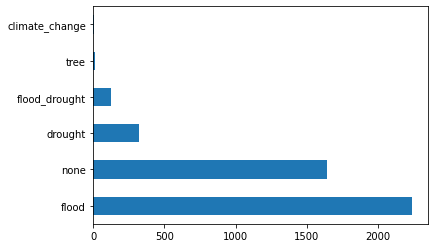

In [49]:
df['category'].value_counts().plot(kind='barh')

In [50]:
df['data source'] = 'newspaper'

In [51]:
df.to_csv('cleaned_merged_labbeled_newspaper_data.csv')